# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lib_file import lib_path
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# EDA (Exploratory Data Analysis)

****Before Data Augmentation****

In [2]:
non_path = "input/Non Demented"
verymild_path = "input/Very mild Dementia"
mild_path = "input/Mild Dementia"
moderate_path = "input/Moderate Dementia"

data_paths = [
    non_path,
    verymild_path,
    mild_path,
    moderate_path
]

In [3]:
chart_data = []
chart_labels = []

for path in data_paths:
    size = len(os.listdir(path))
    chart_data.append(size)
    label = os.path.basename(path)
    chart_labels.append(label)
    print(f'Target name: {label:<20} | number of samples in data: {size}')

Target name: Non Demented         | number of samples in data: 1500
Target name: Very mild Dementia   | number of samples in data: 1500
Target name: Mild Dementia        | number of samples in data: 1500
Target name: Moderate Dementia    | number of samples in data: 488


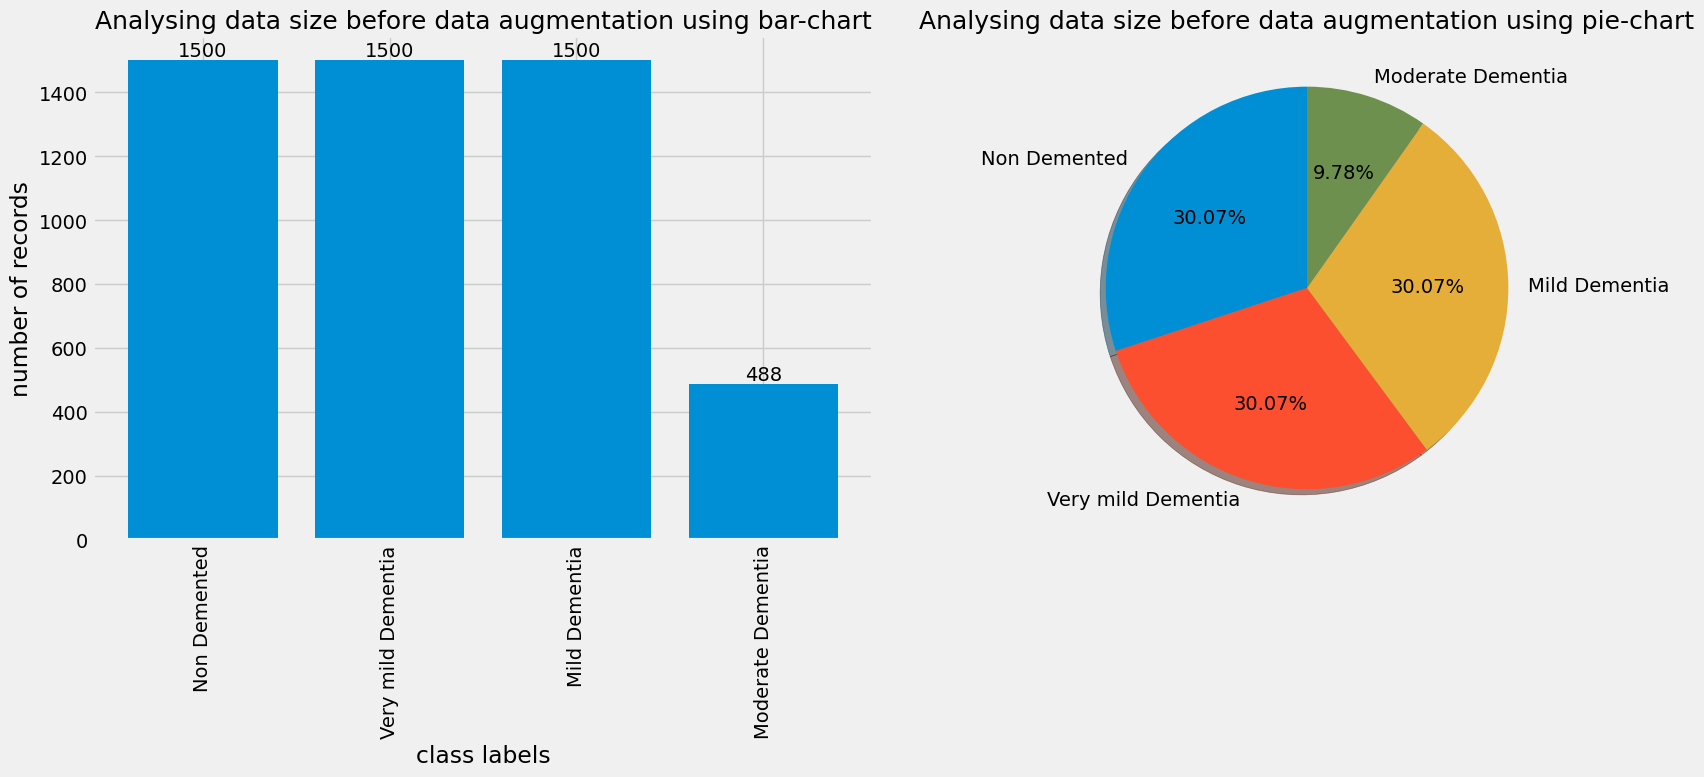

In [4]:
with plt.style.context(style='fivethirtyeight'):
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,8))
    bars = axes[0].bar(x=chart_labels,
                height=chart_data)
    axes[0].set_title(label='Analysing data size before data augmentation using bar-chart', fontsize=18)
    axes[0].set_xlabel(xlabel='class labels')
    axes[0].set_ylabel(ylabel='number of records')
    for tick in axes[0].get_xticklabels():
        tick.set_rotation(90)

    for bar in bars:
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    axes[1].pie(x=chart_data,
                labels=chart_labels,
                autopct='%.2f%%',pctdistance=0.60,
                startangle=90,
                shadow=True)
    axes[1].set_title(label='Analysing data size before data augmentation using pie-chart', fontsize=18)
    fig.tight_layout()
    plt.show()

****After Data Augmentation****

In [5]:
non_path = "input/Non Demented"
verymild_path = "input/Very mild Dementia"
mild_path = "input/Mild Dementia"
moderate_path = "Augmented/Moderate Dementia"

data_paths = [
    non_path,
    verymild_path,
    mild_path,
    moderate_path
]

In [6]:
chart_data = []
chart_labels = []

for path in data_paths:
    size = len(os.listdir(path))
    chart_data.append(size)
    label = os.path.basename(path)
    chart_labels.append(label)
    print(f'Target name: {label:<20} | number of samples in data: {size}')

Target name: Non Demented         | number of samples in data: 1500
Target name: Very mild Dementia   | number of samples in data: 1500
Target name: Mild Dementia        | number of samples in data: 1500
Target name: Moderate Dementia    | number of samples in data: 1500


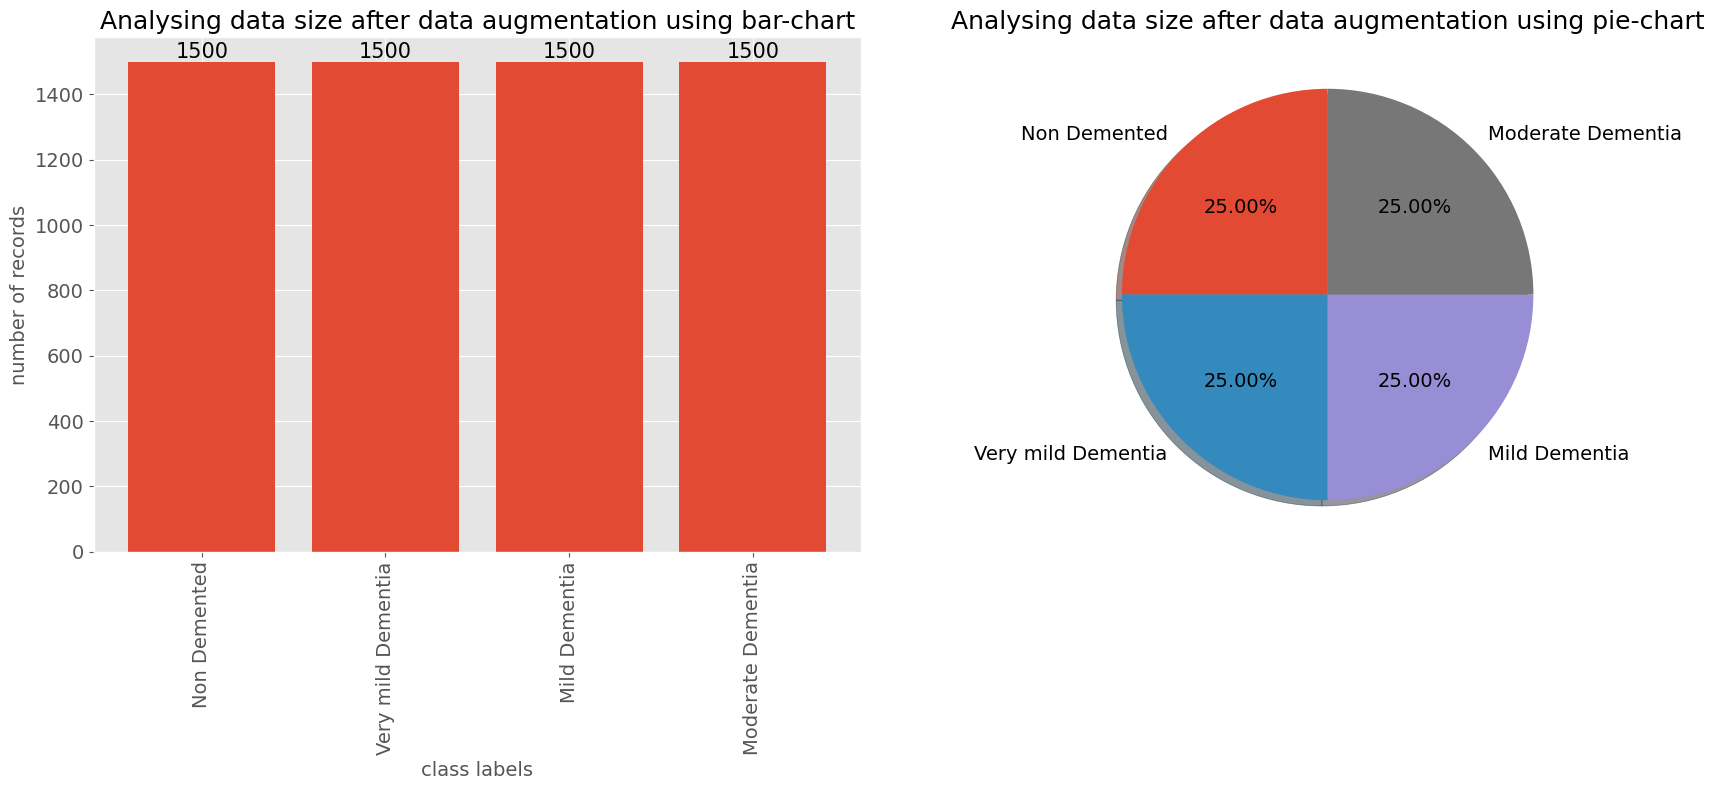

In [7]:
with plt.style.context(style='ggplot'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    bars = axes[0].bar(x=chart_labels, height=chart_data)
    axes[0].set_title(label='Analysing data size after data augmentation using bar-chart', fontsize=18)
    axes[0].set_xlabel(xlabel='class labels', fontsize=14)
    axes[0].set_ylabel(ylabel='number of records', fontsize=14)
    axes[0].tick_params(axis='both', which='major', labelsize=14)
    for tick in axes[0].get_xticklabels():
        tick.set_rotation(90)
    for bar in bars:
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=15)

    axes[1].pie(x=chart_data,
                labels=chart_labels,
                autopct='%.2f%%', pctdistance=0.60,
                startangle=90,
                shadow=True,
                textprops={'fontsize': 14})
    axes[1].set_title(label='Analysing data size after data augmentation using pie-chart', fontsize=18)
    fig.tight_layout()
    plt.show()

In [11]:
class_labels = [
    "Non Demented",
    "Very mild Dementia",
    "Mild Dementia",
    "Moderate Dementia"
]

In [12]:
target_size = (128, 128)

In [13]:
X = []
y = []

for idx, path in enumerate(data_paths):
    files = os.listdir(path)
    print(f"Loading images from {os.path.basename(path)} target...")
    for sample in tqdm(files):
        filepath = os.path.join(path, sample)
        image = Image.open(filepath)
        resized_image = image.resize(target_size)
        normalized_image = np.array(resized_image)
        normalized_image = normalized_image / 255.0
        X.append(normalized_image)
        y.append(idx)

Loading images from Non Demented target...


100%|██████████| 1500/1500 [01:05<00:00, 22.80it/s] 


Loading images from Very mild Dementia target...


100%|██████████| 1500/1500 [01:11<00:00, 20.91it/s] 


Loading images from Mild Dementia target...


100%|██████████| 1500/1500 [00:34<00:00, 44.02it/s] 


Loading images from Moderate Dementia target...


100%|██████████| 1500/1500 [00:35<00:00, 41.91it/s] 


In [14]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(6000, 128, 128, 3) (6000,)


In [15]:
def show_images(images,labels,str_labels):
    plt.figure(figsize=(10,10))
    plt.rcParams['font.size'] = 10
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        idx = random.randint(0, len(images)-1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(label=f"Class: {str_labels[labels[idx]]}")
    plt.tight_layout()
    plt.show()

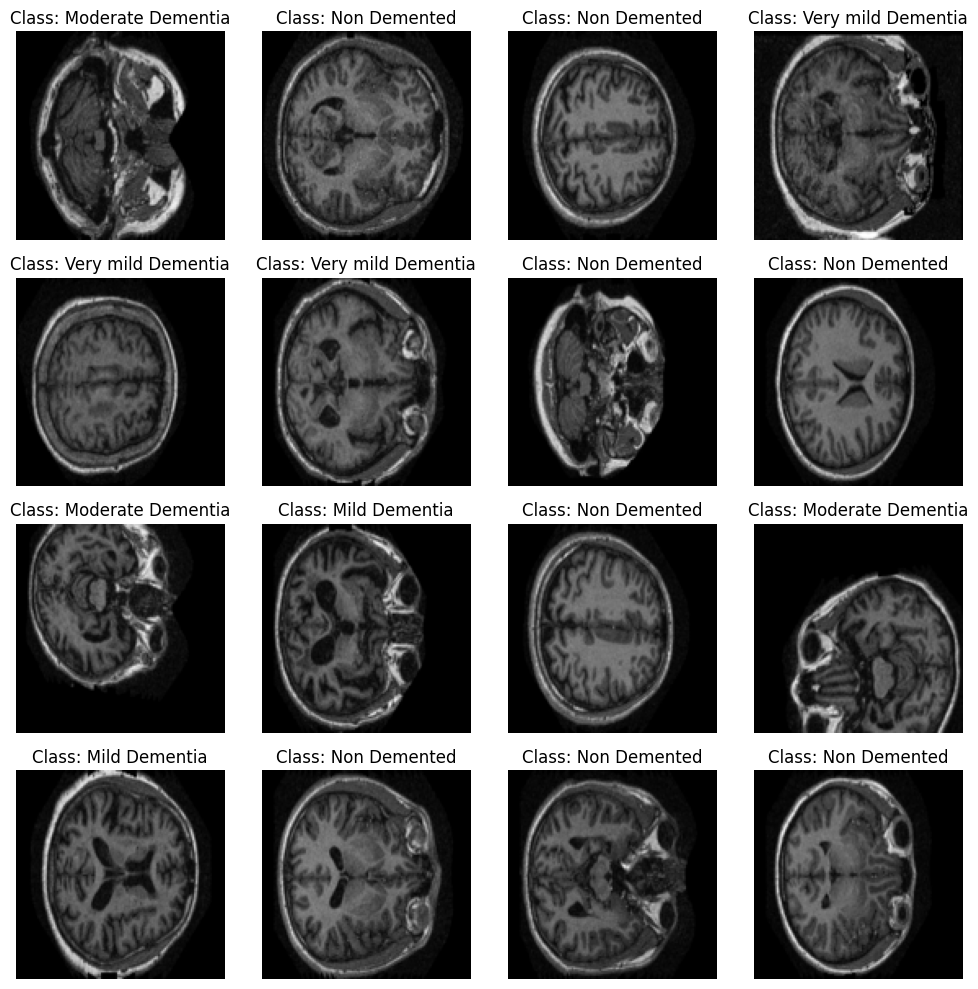

In [16]:
show_images(X, y, class_labels)

# Data Splitting

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4800, 128, 128, 3) (1200, 128, 128, 3) (4800,) (1200,)


# Algorithm: ConvolutionalNeuralNetwork

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.regularizers import L1
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
y, y_train, y_test = to_categorical(y), to_categorical(y_train), to_categorical(y_test)

In [19]:
cnn_model=Sequential()

cnn_model.add(Input(shape=(128, 128, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(GlobalAveragePooling2D())
cnn_model.add(Dropout(rate=0.4))
cnn_model.add(Dense(units=128, activation="relu"))
cnn_model.add(Dense(units=len(class_labels), activation="softmax"))

In [20]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        3

***Model training***

In [21]:
EPOCHS = 15

history = cnn_model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=EPOCHS,
    validation_data=(X_test, y_test),
    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0)]
)

Epoch 1/15
75/75 [==============================] - 20s 104ms/step - loss: 1.1676 - accuracy: 0.4892 - val_loss: 1.4237 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 2/15
75/75 [==============================] - 6s 82ms/step - loss: 0.7866 - accuracy: 0.7250 - val_loss: 1.4803 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 3/15
75/75 [==============================] - 6s 83ms/step - loss: 0.4904 - accuracy: 0.8665 - val_loss: 1.5336 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 4/15
75/75 [==============================] - 6s 83ms/step - loss: 0.3528 - accuracy: 0.9229 - val_loss: 1.7003 - val_accuracy: 0.2500 - lr: 1.0000e-05
Epoch 5/15
75/75 [==============================] - 6s 83ms/step - loss: 0.3273 - accuracy: 0.9346 - val_loss: 1.9243 - val_accuracy: 0.2500 - lr: 1.0000e-05
Epoch 6/15
75/75 [==============================] - 6s 83ms/step - loss: 0.3271 - accuracy: 0.9281 - val_loss: 2.0323 - val_accuracy: 0.2508 - lr: 1.0000e-06
Epoch 7/15
75/75 [==============================] 

***Accuracy and Loss plot-graphs***

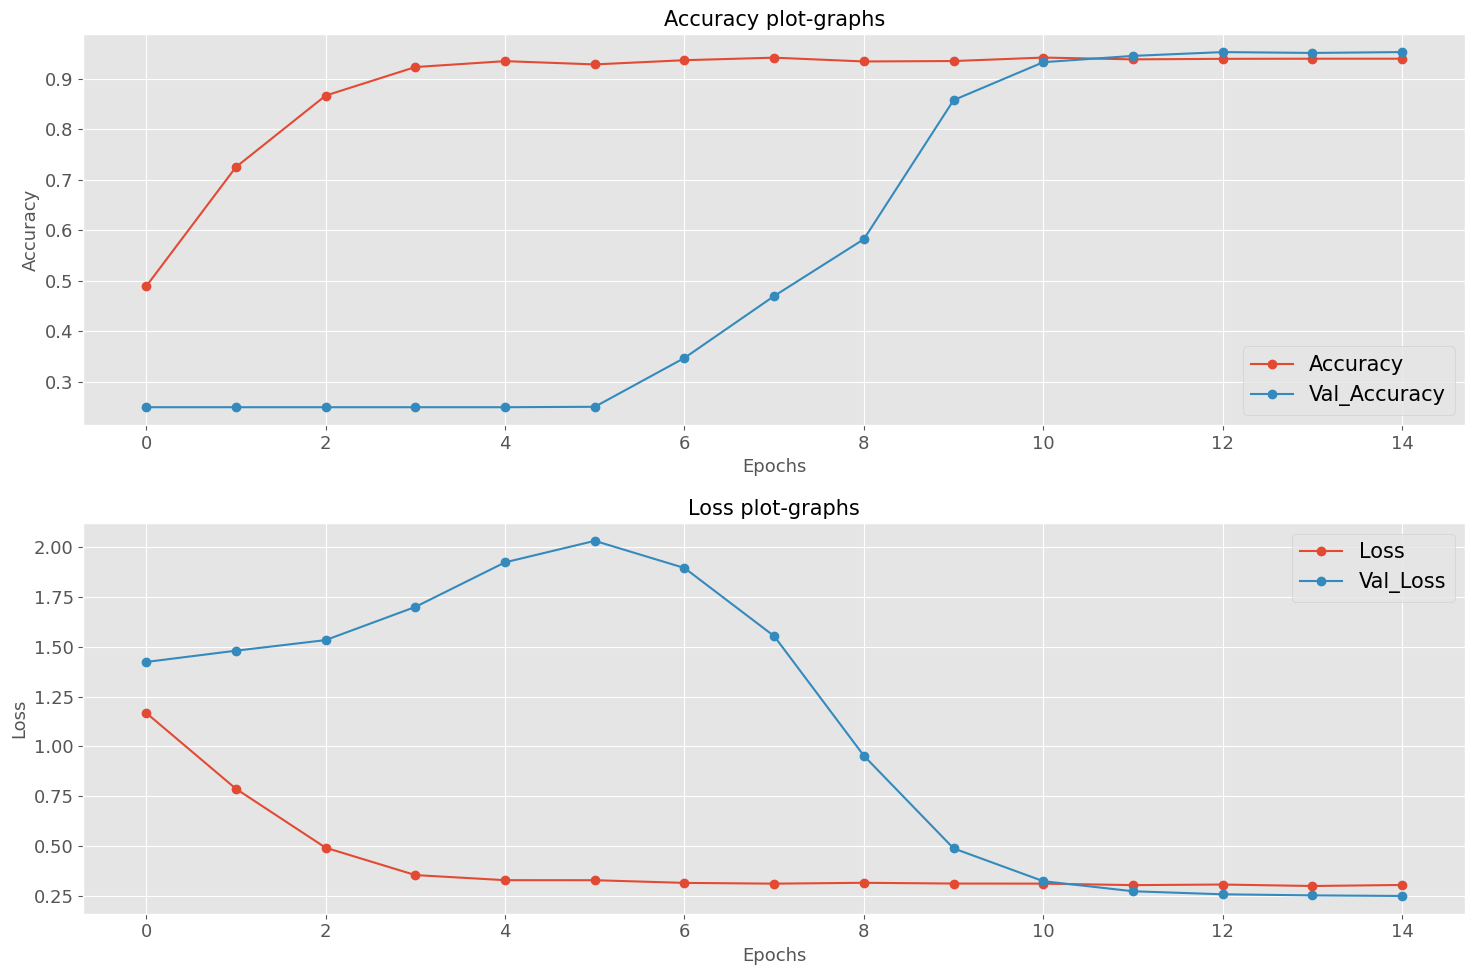

In [22]:
with plt.style.context(style="ggplot"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    plt.rcParams["font.size"] = 15

    axes[0].plot(history.history['accuracy'], label='Accuracy', marker='o')
    axes[0].plot(history.history['val_accuracy'], label='Val_Accuracy', marker='o')
    axes[0].set_title(label='Accuracy plot-graphs', fontsize=15)
    axes[0].set_xlabel(xlabel='Epochs', fontsize=13)
    axes[0].set_ylabel(ylabel='Accuracy', fontsize=13)
    axes[0].tick_params(axis='both', which='major', labelsize=13)
    axes[0].legend()

    axes[1].plot(history.history['loss'], label='Loss', marker='o')
    axes[1].plot(history.history['val_loss'], label='Val_Loss', marker='o')
    axes[1].set_title(label='Loss plot-graphs', fontsize=15)
    axes[1].set_xlabel(xlabel='Epochs', fontsize=13)
    axes[1].set_ylabel(ylabel='Loss', fontsize=13)
    axes[1].tick_params(axis='both', which='major', labelsize=13)
    axes[1].legend()

    fig.tight_layout()
    plt.show()

In [23]:
model_prediction = cnn_model.predict(X_test, batch_size=32, verbose=1)

38/38 [==============================] - 2s 24ms/step


In [24]:
print(model_prediction)

[[0.00319643 0.97193456 0.013629   0.01124   ]
 [0.7337203  0.03266343 0.14329156 0.09032473]
 [0.04019611 0.04355534 0.86105376 0.05519483]
 ...
 [0.00372713 0.92044437 0.04174993 0.03407848]
 [0.01410083 0.01653819 0.00515739 0.9642035 ]
 [0.05843988 0.91365206 0.01674845 0.01115962]]


In [25]:
pred = np.argmax(model_prediction, axis=1)
actual = np.argmax(y_test, axis=1)

In [26]:
print(pred.tolist())

[1, 0, 2, 3, 2, 3, 1, 1, 0, 0, 2, 0, 2, 1, 3, 1, 2, 3, 3, 1, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 3, 1, 1, 1, 2, 0, 1, 3, 0, 1, 3, 1, 1, 2, 0, 0, 3, 2, 1, 2, 0, 3, 0, 3, 2, 3, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 3, 3, 2, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 2, 1, 2, 2, 0, 2, 3, 1, 2, 3, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 3, 3, 3, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 3, 3, 2, 1, 0, 0, 1, 3, 0, 0, 0, 2, 0, 3, 2, 2, 3, 0, 3, 1, 3, 1, 2, 3, 1, 0, 3, 2, 1, 0, 0, 3, 0, 3, 2, 1, 0, 2, 0, 3, 1, 1, 3, 0, 3, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 3, 2, 3, 3, 0, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 1, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 3, 0, 3, 2, 1, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 3, 2, 2, 1, 0, 3, 0, 2, 1, 3, 0, 0, 0, 3, 3, 0, 0, 1, 1, 0, 2, 2, 1, 0, 3, 1, 2, 0, 3, 0, 2, 1, 2, 1, 1, 0, 1, 2, 3, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 3, 3, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 0, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 3, 2, 2, 1, 3, 3, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 1, 0, 3, 2, 3, 3, 0, 1, 1, 0, 0, 

In [27]:
print(actual.tolist())

[1, 0, 2, 3, 2, 3, 0, 1, 0, 0, 2, 0, 2, 1, 3, 1, 2, 3, 3, 1, 1, 1, 2, 1, 3, 3, 0, 1, 1, 1, 3, 2, 3, 1, 2, 1, 2, 0, 1, 3, 0, 1, 3, 1, 1, 2, 0, 0, 3, 2, 0, 2, 0, 3, 0, 3, 2, 3, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 3, 3, 2, 0, 0, 1, 0, 3, 0, 0, 3, 0, 1, 2, 1, 2, 2, 0, 1, 3, 1, 2, 3, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 3, 3, 3, 3, 0, 1, 2, 3, 2, 2, 1, 0, 0, 1, 1, 3, 3, 2, 1, 0, 0, 1, 3, 0, 0, 0, 2, 0, 3, 2, 2, 3, 0, 3, 1, 3, 1, 2, 3, 1, 0, 3, 2, 1, 0, 0, 3, 0, 3, 2, 1, 0, 2, 0, 3, 1, 1, 3, 0, 3, 0, 3, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 3, 2, 3, 3, 0, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 1, 3, 3, 1, 3, 2, 0, 1, 2, 1, 2, 3, 0, 3, 2, 1, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 3, 2, 2, 1, 0, 3, 0, 2, 1, 3, 0, 1, 0, 3, 3, 0, 0, 1, 1, 0, 0, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 0, 2, 1, 1, 0, 1, 2, 3, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 3, 3, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 3, 2, 2, 1, 3, 3, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 1, 0, 3, 2, 3, 3, 0, 1, 1, 0, 0, 

### Result Analysis

In [28]:
model_accuracy = accuracy_score(y_true=actual, y_pred=pred)
print(f"Validation accuracy of ConvolutionalNeuralNetwork model is {model_accuracy*100.0:.2f}%")

Validation accuracy of ConvolutionalNeuralNetwork model is 95.25%


***Classification Report***

In [30]:
print(classification_report(y_true=actual, y_pred=pred, target_names=class_labels))

                    precision    recall  f1-score   support

      Non Demented       0.97      0.94      0.96       300
Very mild Dementia       0.92      0.94      0.93       300
     Mild Dementia       0.94      0.97      0.95       300
 Moderate Dementia       0.98      0.96      0.97       300

          accuracy                           0.95      1200
         macro avg       0.95      0.95      0.95      1200
      weighted avg       0.95      0.95      0.95      1200



***Confusion Matrix***

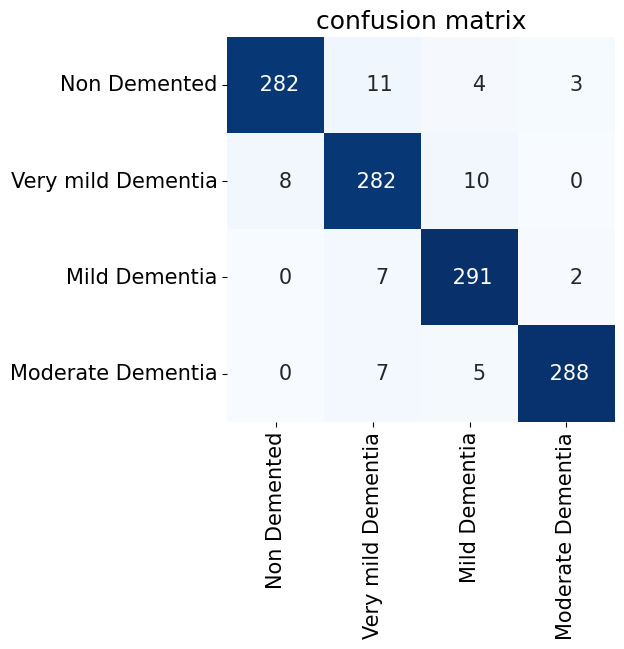

In [31]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=15
ax=sns.heatmap(data=confusion_matrix(y_true=actual, y_pred=pred),
               annot=True,
               fmt='4d',
               cbar=False,
               xticklabels=class_labels,
               yticklabels=class_labels,
               cmap=plt.cm.Blues)
plt.title(label='confusion matrix')
plt.show()

***model saving***

In [32]:
cnn_model.save("models/ConvolutionalNeuralNetwork_model.h5")

---